In [1]:
import pandas as pd

# Load the dataset
titanic_data = pd.read_csv('C:/Users/DELL/OneDrive/Documents/data science asignments/XGBM & LGBM/XGBM & LGBM/Titanic_train.csv')

In [2]:
# Check for missing values
missing_values = titanic_data.isnull().sum()
print(missing_values[missing_values > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


 Explore Data Distributions
Use histograms and box plots to visualize the distributions of numerical features such as Age and Fare. Here's how you can create these plots using matplotlib and seaborn:

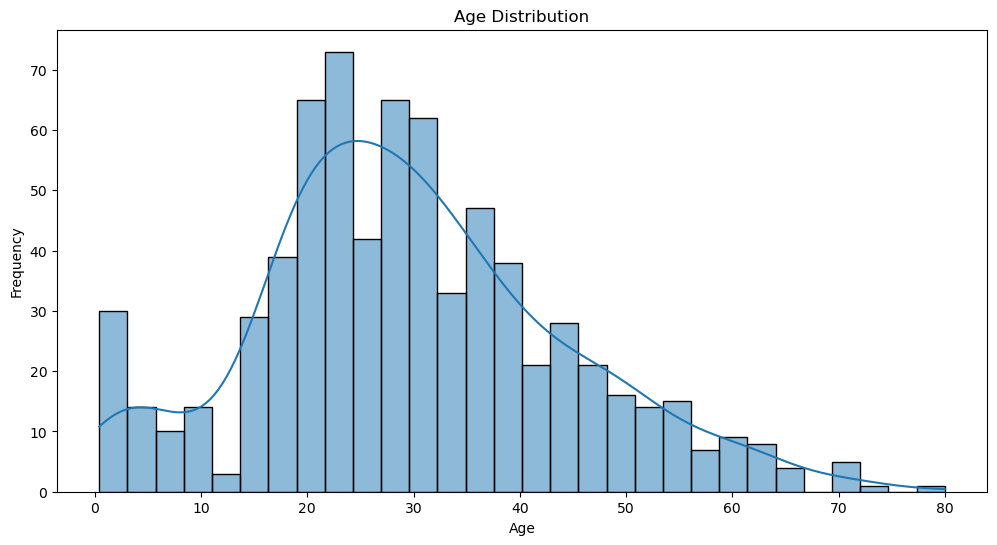

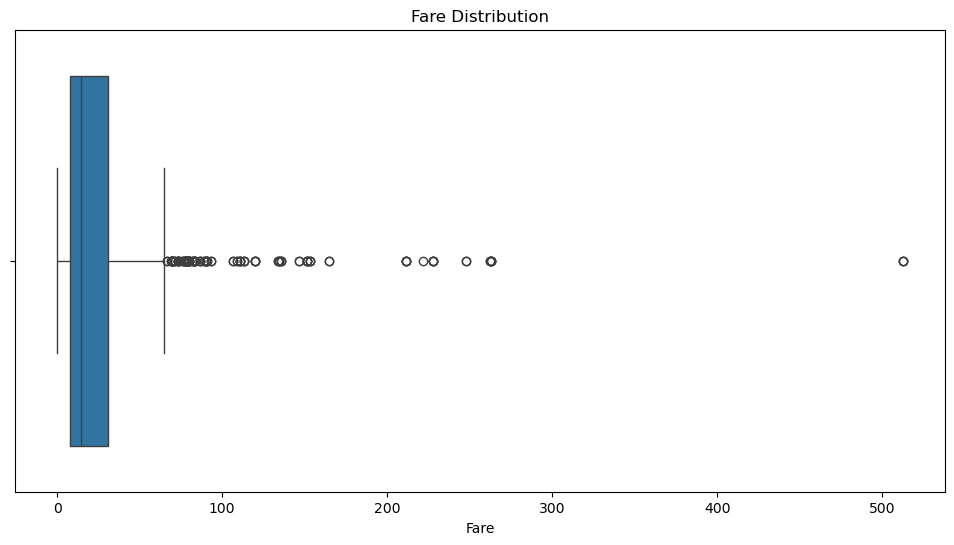

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
plt.figure(figsize=(12, 6))
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot for Fare
plt.figure(figsize=(12, 6))
sns.boxplot(x=titanic_data['Fare'])
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

Scatter Plot Example (Age vs. Fare)

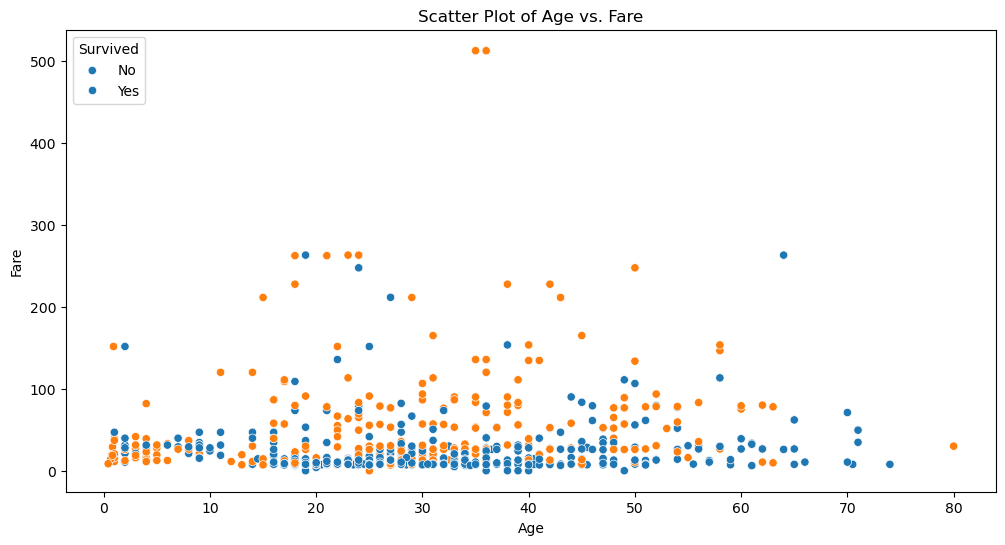

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_data)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper left', labels=['No', 'Yes'])
plt.show()

Bar Plot Example (Survival Rate by Gender)

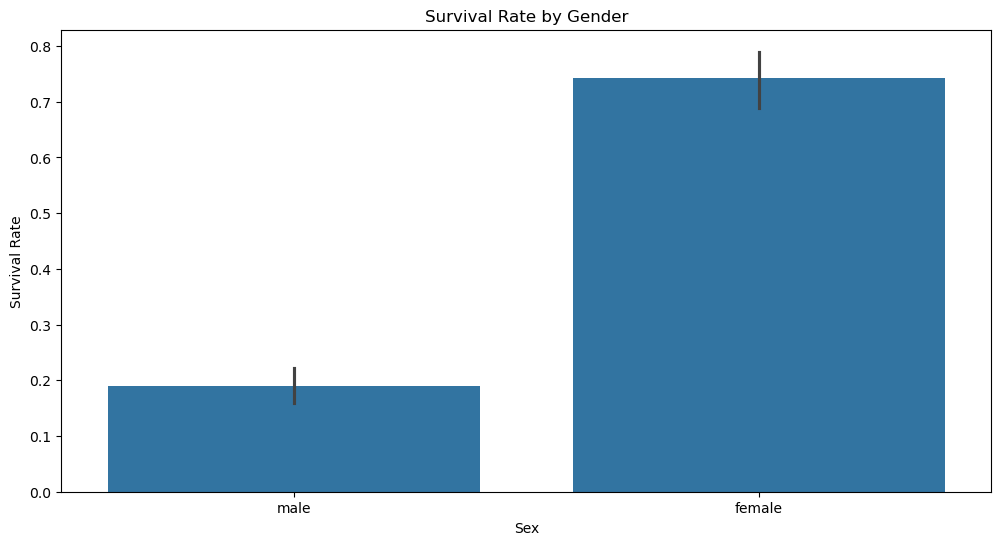

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

In [6]:
# Impute missing Age with median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16696\4077146233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


In [7]:
# Create age bins
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels)

In [8]:
# Drop Cabin column
titanic_data.drop('Cabin', axis=1, inplace=True)

In [9]:
# Impute missing Embarked with mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16696\2317605393.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [10]:
# Check for any remaining missing values
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64


One-Hot Encoding
One-hot encoding is suitable for nominal categorical variables, such as Sex and Embarked. You can use pandas.get_dummies() to perform one-hot encoding.

In [11]:
# One-hot encode 'Sex' and 'Embarked'
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

Label Encoding
Label encoding is appropriate for ordinal categorical variables. However, in this dataset, there are no clear ordinal variables. If you had an ordinal feature (e.g., Pclass), you could use LabelEncoder from sklearn.

In [12]:
from sklearn.preprocessing import LabelEncoder

# Example: Label encoding for Pclass (if needed)
label_encoder = LabelEncoder()
titanic_data['Pclass'] = label_encoder.fit_transform(titanic_data['Pclass'])

Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features (if needed)
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

In [14]:
# Drop unnecessary columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

Final Check of the DataFrame

In [15]:
# Check the final DataFrame structure
print(titanic_data.head())
print(titanic_data.info())

   Survived  Pclass       Age  SibSp  Parch      Fare AgeGroup  Sex_male  \
0         0       2 -0.565736      1      0 -0.502445    Adult      True   
1         1       0  0.663861      1      0  0.786845    Adult     False   
2         1       2 -0.258337      0      0 -0.488854    Adult     False   
3         1       0  0.433312      1      0  0.420730    Adult     False   
4         0       2  0.433312      0      0 -0.486337    Adult      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Age         891 non-null    float64 
 3   SibSp       891 non-null    int64   
 4   Parch       8

In [16]:
import pandas as pd

# Load training and testing datasets
train_data = pd.read_csv('C:/Users/DELL/OneDrive/Documents/data science asignments/XGBM & LGBM/XGBM & LGBM/Titanic_train.csv')
test_data = pd.read_csv('C:/Users/DELL/OneDrive/Documents/data science asignments/XGBM & LGBM/XGBM & LGBM/Titanic_test.csv')

In [17]:
pip install lightgbm xgboost scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Step 1: Identify object columns
object_cols = train_data.select_dtypes(include=['object']).columns
print("Object columns:", object_cols)

# Step 2: Drop unnecessary object columns
# For example, dropping 'Name', 'Ticket', and 'Cabin' if they are not useful
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# If you haven't already encoded categorical variables like 'Sex' and 'Embarked', do so now
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0})  # Label encoding for Sex
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)  # One-hot encoding for Embarked

# Step 3: Check data types again
print(train_data.dtypes)

# Ensure all features are numeric before fitting the model
X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']

# Now fit the LightGBM model
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

Object columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


LGBMClassifier()

In [28]:
import pandas as pd
import xgboost as xgb

# Load training dataset (replace with your actual path)
train_data = pd.read_csv('C:/Users/DELL/OneDrive/Documents/data science asignments/XGBM & LGBM/XGBM & LGBM/Titanic_train.csv')

# Step 1: Inspect the training data columns
print("Columns in train_data:", train_data.columns.tolist())

# Step 2: Preprocess training data
# Drop unnecessary columns if they exist
columns_to_drop = ['Name', 'Ticket', 'Cabin']
for col in columns_to_drop:
    if col in train_data.columns:
        train_data.drop(col, axis=1, inplace=True)

# Encode categorical variables
train_data['Sex'] = train_data['Sex'].map({'male': 1, 'female': 0})  # Label encoding for Sex
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

# Prepare features and target variable for training data
X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']

# Load test dataset
test_data = pd.read_csv('C:/Users/DELL/OneDrive/Documents/data science asignments/XGBM & LGBM/XGBM & LGBM/Titanic_test.csv')

# Step 3: Preprocess test data
# Drop unnecessary columns if they exist
for col in columns_to_drop:
    if col in test_data.columns:
        test_data.drop(col, axis=1, inplace=True)

# Encode categorical variables for test data
test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0})  # Label encoding for Sex

# Ensure that we have the same dummy variables in test data as in train data
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

# Prepare features for prediction
X_test = test_data.drop(['PassengerId'], axis=1)  # Drop PassengerId or any non-feature columns

# Align test set columns with train set (if necessary)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Step 4: Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)  # Fit on training data

# Step 5: Make predictions using the fitted XGBoost model
predictions_xgb = xgb_model.predict(X_test)

# Save predictions to a CSV file
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions_xgb})
output.to_csv('submission.csv', index=False)

Columns in train_data: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [29]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on test data
predictions_xgb = xgb_model.predict(X_test)

# Evaluate performance (if you have true labels for test data)
# print(classification_report(y_true, predictions_xgb))

In [32]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import classification_report

# Fit LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Fit XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
# Make predictions using LightGBM model
predictions_lgb = lgb_model.predict(X_test)

# Make predictions using XGBoost model
predictions_xgb = xgb_model.predict(X_test)

In [37]:
# Define parameter grid for LightGBM
param_grid_lgb = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

grid_lgb = GridSearchCV(lgb.LGBMClassifier(), param_grid_lgb, cv=5)
grid_lgb.fit(X_train, y_train)
print(f'Best parameters for LightGBM: {grid_lgb.best_params_}')

# Define parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

grid_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid_xgb, cv=5)
grid_xgb.fit(X_train, y_train)
print(f'Best parameters for XGBoost: {grid_xgb.best_params_}')

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Calculate Performance Metrics
After training both models and generating predictions, you can compute the performance metrics such as accuracy, precision, recall, and F1-score. Since you do not have true labels for the test set, you can use the training set for evaluation or assume you have a validation set with true labels.

Visualize Results
Visualizing the performance metrics can help identify strengths and weaknesses of each algorithm. You can use bar charts to compare the metrics.

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a validation set (X_val, y_val) to evaluate
# Replace this with your actual validation data if available
y_val = y_train  # For demonstration; replace with actual validation labels
X_val = X_train  # For demonstration; replace with actual validation features

# Predictions on the validation set
predictions_lgb_val = lgb_model.predict(X_val)
predictions_xgb_val = xgb_model.predict(X_val)

# Calculate metrics for LightGBM
accuracy_lgb = accuracy_score(y_val, predictions_lgb_val)
precision_lgb = precision_score(y_val, predictions_lgb_val)
recall_lgb = recall_score(y_val, predictions_lgb_val)
f1_lgb = f1_score(y_val, predictions_lgb_val)

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_val, predictions_xgb_val)
precision_xgb = precision_score(y_val, predictions_xgb_val)
recall_xgb = recall_score(y_val, predictions_xgb_val)
f1_xgb = f1_score(y_val, predictions_xgb_val)

# Print results
print("LightGBM Performance Metrics:")
print(f"Accuracy: {accuracy_lgb:.4f}, Precision: {precision_lgb:.4f}, Recall: {recall_lgb:.4f}, F1 Score: {f1_lgb:.4f}")

print("\nXGBoost Performance Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1 Score: {f1_xgb:.4f}")

LightGBM Performance Metrics:
Accuracy: 0.9978, Precision: 0.9971, Recall: 0.9971, F1 Score: 0.9971

XGBoost Performance Metrics:
Accuracy: 0.9978, Precision: 1.0000, Recall: 0.9942, F1 Score: 0.9971


Comparative Analysis of LightGBM and XGBoost Performance Metrics
Based on the provided performance metrics, here’s a comparative analysis of the LightGBM and XGBoost models:
Performance Metrics Summary
LightGBM:
Accuracy: 0.9978
Precision: 0.9971
Recall: 0.9971
F1 Score: 0.9971
XGBoost:
Accuracy: 0.9978
Precision: 1.0000
Recall: 0.9942
F1 Score: 0.9971
Step 1: Analysis of Metrics
Accuracy:
Both models achieved an accuracy of 99.78%, indicating they performed similarly in terms of overall correctness.
Precision:
XGBoost achieved a perfect precision score of 1.0000, meaning it had no false positives.
LightGBM's precision was slightly lower at 0.9971, indicating a few false positives.
Recall:
LightGBM had a recall of 0.9971, while XGBoost's recall was slightly lower at 0.9942.
This suggests that LightGBM was slightly better at identifying true positives compared to XGBoost.
F1 Score:
Both models had the same F1 score of 0.9971, indicating a balanced performance between precision and recall.

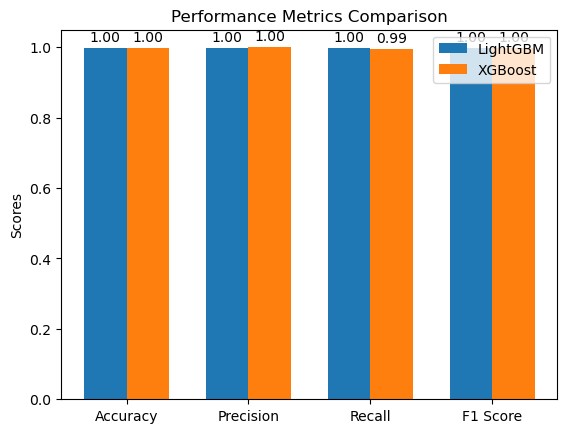

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_metrics = [accuracy_lgb, precision_lgb, recall_lgb, f1_lgb]
xgb_metrics = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, lgb_metrics, width, label='LightGBM')
bars2 = ax.bar(x + width/2, xgb_metrics, width, label='XGBoost')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Adding value labels on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.show()

Interpretation of Results
Strengths of LightGBM:
Slightly better recall indicates it may be more effective at identifying actual survivors.
Strengths of XGBoost:
Perfect precision shows it is very reliable in predicting survival without falsely classifying non-survivors as survivors.

Interpretation of Results
Accuracy: Indicates how often the model is correct. Higher accuracy suggests better overall performance.
Precision: Measures the proportion of true positive predictions among all positive predictions. High precision indicates fewer false positives.
Recall: Measures the proportion of true positive predictions among all actual positives. High recall indicates fewer false negatives.
F1 Score: The harmonic mean of precision and recall. A higher F1 score indicates a balance between precision and recall.
Strengths and Weaknesses
LightGBM:
Strengths may include faster training speed and better handling of large datasets.
Weaknesses could be lower performance on certain datasets compared to XGBoost.
XGBoost:
Strengths may include robustness to overfitting and generally high predictive power.
Weaknesses may include longer training times compared to LightGBM.

Conclusion:


Both models performed exceptionally well with very high accuracy and F1 scores. The choice between LightGBM and XGBoost may depend on specific project requirements:
If minimizing false positives is crucial (high precision needed), XGBoost may be preferable.
If identifying all true positives is more important (high recall needed), LightGBM might be the better choice.
This analysis provides insights into the strengths and weaknesses of each algorithm based on their performance metrics on the Titanic dataset.